# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 8 - Normal modes and Schrodinger equation

In [18]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

In [19]:
# Solving for two masses: equal masses and springs; fixed boundaries

k = 1.0
m = 1.0
omg0_sq = k/m

T = omg0_sq * np.array([[2, -1],
                        [-1, 2]])
eigenvalues, eigenvectors = np.linalg.eig(T)

print('Eigenvalues:', eigenvalues)
print('Eigenvectors:', eigenvectors.T[0], eigenvectors.T[1])

Eigenvalues: [3. 1.]
Eigenvectors: [ 0.70710678 -0.70710678] [0.70710678 0.70710678]


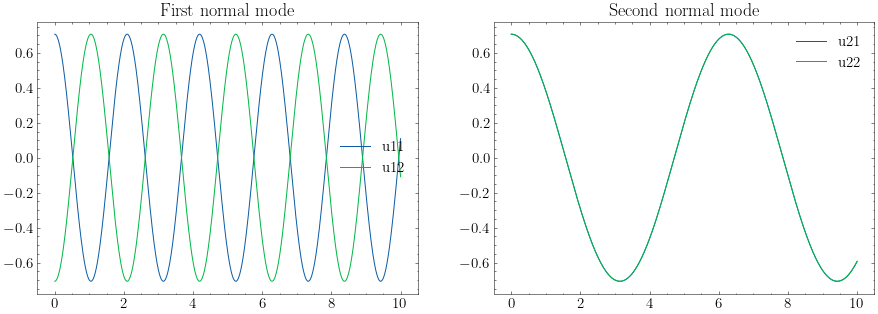

In [27]:
w1 = eigenvalues[0]
w2 = eigenvalues[1]
a1 = eigenvectors.T[0]
a2 = eigenvectors.T[1]

delta = 0.0

dt = 0.01
t = np.arange(0, 10+dt, dt)

u1_1 = a1[0]*np.cos(w1*t - delta)
u1_2 = a1[1]*np.cos(w1*t - delta)

u2_1 = a2[0]*np.cos(w2*t - delta)
u2_2 = a2[1]*np.cos(w2*t - delta)


plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(t, u1_1, label='u11')
plt.plot(t, u1_2, label='u12')
plt.title('First normal mode')
plt.legend()

plt.subplot(1,2,2)
plt.plot(t, u2_1, label='u21')
plt.plot(t, u2_2, label='u22')
plt.title('Second normal mode')
plt.legend()

plt.show()